# Function & Load Data

In [14]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 24-01-14 09:14 형경 : 주석삽입 및 0104 파일 붙여서 업로드

# 데이터 불러오기 : 마스터파일
file_path = 'D:\Code\(최종)서울시 자전거 프로젝트/서울시 따릉이대여소 마스터 정보.csv'

df_master = pd.read_csv(file_path,encoding='cp949')

print(df_master)

df_master.isnull().sum()

       대여소_ID                      주소1            주소2         위도          경도
0      ST-999       서울특별시 양천구 목동서로 280  목동아파트 8단지 상가동   0.000000    0.000000
1      ST-998       서울특별시 양천구 목동서로 130  목동아파트 4단지 상가동   0.000000    0.000000
2      ST-997       서울특별시 양천구 목동중앙로 49  목동3단지 시내버스정류장  37.534390  126.869598
3      ST-996   서울특별시 양천구 남부순환로88길5-16     양강중학교앞 교차로  37.524334  126.850548
4      ST-995  서울특별시 양천구 중앙로 153 공중화장실            NaN  37.510597  126.857323
...       ...                      ...            ...        ...         ...
3265  ST-1002     서울특별시 양천구 목동동로 316-6   서울시 도로환경관리센터  37.529900  126.876541
3266  ST-1001      서울특별시 양천구 남부순환로4길20        서서울호수공원   0.000000    0.000000
3267  ST-1000        서울특별시 양천구 신정동 236    서부식자재마트 건너편  37.510380  126.866798
3268   ST-100       서울특별시 광진구 아차산로 262    더샵스타시티 C동 앞  37.536667  127.073593
3269    ST-10         서울특별시 마포구 양화로 93            427  37.552746  126.918617

[3270 rows x 5 columns]


대여소_ID       0
주소1          0
주소2       1757
위도           0
경도           0
dtype: int64

## Data Pre-Processing

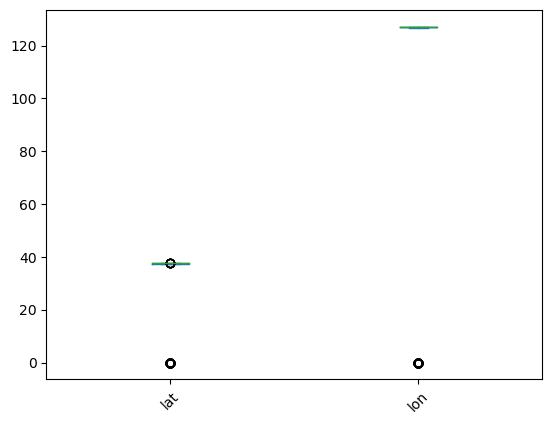

In [15]:
# 데이터 전처리

df_master.isnull().sum()

# 경도,위도 컬럼명 변경 : map
df_master.rename(columns={'위도':'lat','경도':'lon'}, inplace = True)

# 이상치 처리
df_master.loc[:,['lat','lon']].plot(kind='box', rot=45)
plt.show()



In [16]:
# 경도, 위도가 0인 컬럼이 77개 존재 : 삭제처리

print('*'*80)

cond = (df_master['lat']==0) | (df_master['lon']==0) # 경도와 위도가 0인 집합을 컨디션으로 정의

counts = df_master.loc[cond,:].index # df_master에 위도와 경도가 0인 인덱스를 추출

print(len(counts)) # 위도와 경도가 0인 이상치값이 77개로 카운트

df_master1 = df_master.drop(df_master.loc[cond,:].index,axis=0) # 이상치 77개인 행을 드랍.

df_master1.reset_index(drop = True, inplace=True) # 인덱스 재조합

print('*'*80)

print(df_master1)


********************************************************************************
77
********************************************************************************
       대여소_ID                          주소1            주소2        lat  \
0      ST-997           서울특별시 양천구 목동중앙로 49  목동3단지 시내버스정류장  37.534390   
1      ST-996       서울특별시 양천구 남부순환로88길5-16     양강중학교앞 교차로  37.524334   
2      ST-995      서울특별시 양천구 중앙로 153 공중화장실            NaN  37.510597   
3      ST-994            서울특별시 양천구 목동서로161         SBS방송국  37.529163   
4      ST-993  서울특별시 양천구 신월로 342-1 구두수선대19            NaN  37.521511   
...       ...                          ...            ...        ...   
3188  ST-1003             서울특별시 양천구 화곡로 59        신월동 이마트  37.539551   
3189  ST-1002         서울특별시 양천구 목동동로 316-6   서울시 도로환경관리센터  37.529900   
3190  ST-1000            서울특별시 양천구 신정동 236    서부식자재마트 건너편  37.510380   
3191   ST-100           서울특별시 광진구 아차산로 262    더샵스타시티 C동 앞  37.536667   
3192    ST-10             서울특별시 마포구 양화로 93 

In [17]:
st.write(df_master1)

# df = pd.DataFrame(
    # np.random.random(1000, 2) / [50, 50] + [37.76, -122.4],
    # columns=['lat', 'lon'])

st.map(df_master1)

'''
숙제 : 마스터 데이터로는 경도,위도 정보가 있는 대여소의 위치만 표시
        추후에 메인의 대여정보 데이터에 경도,위도 컬럼을 추가하여 데이터 표시 해보자.    
'''


'\n숙제 : 마스터 데이터로는 경도,위도 정보가 있는 대여소의 위치만 표시\n        추후에 메인의 대여정보 데이터에 경도,위도 컬럼을 추가하여 데이터 표시 해보자.    \n'

## 0104 컬럼에 경도 위도 추가. 경도값 위도값 수정 필요

In [27]:
file_path1 = 'D:\Code\(최종)서울시 자전거 프로젝트/tpss_bcycl_od_statnhm_20240104.csv'

df_rent1 = pd.read_csv(file_path1,encoding='cp949')

print(df_rent1)

df_rent1

df_rent1.isnull().sum()


           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0       20240104  출발시간       0   ST-1014  신정3동_101_1    ST-676  고척2동_035_1   
1       20240104  출발시간       0   ST-1017   목5동_059_1    ST-310   목4동_047_1   
2       20240104  출발시간       0   ST-1055   강일동_001_1   ST-2744   강일동_001_5   
3       20240104  출발시간       0   ST-1082   장지동_019_1   ST-2599   장지동_012_3   
4       20240104  출발시간       0   ST-1092  풍납2동_026_1    ST-502  성내1동_007_1   
...          ...   ...     ...       ...         ...       ...         ...   
180069  20240104  도착시간    2355    ST-914  상계5동_036_1   ST-2711  중계1동_001_1   
180070  20240104  도착시간    2355    ST-935  방배4동_002_1   ST-1916  방배본동_030_1   
180071  20240104  도착시간    2355    ST-942  면목5동_015_1    ST-262  장안2동_053_1   
180072  20240104  도착시간    2355     ST-96   상암동_060_1   ST-3272  성산2동_038_1   
180073  20240104  도착시간    2355    ST-997   목4동_021_1   ST-1013   목3동_003_1   

        전체_건수  전체_이용_분  전체_이용_거리  
0           1        6      

기준_날짜          0
집계_기준          0
기준_시간대         0
시작_대여소_ID      0
시작_대여소명        0
종료_대여소_ID      0
종료_대여소명      671
전체_건수          0
전체_이용_분        0
전체_이용_거리       0
dtype: int64

In [19]:
# 시작 대여소 중 제일 많이 이용한 상위 10개의 대여소

s_rent1 = df_rent1['시작_대여소_ID'].value_counts(ascending=False)[:10]
print(s_rent1)

시작_대여소_ID
ST-2031    991
ST-1718    571
ST-2045    546
ST-1065    451
ST-413     440
ST-668     419
ST-891     395
ST-1938    369
ST-2871    350
ST-2557    343
Name: count, dtype: int64


In [20]:
# 제일 많이 이용한 대여소에서 같은 곳으로 반납한 인원들의 밸류값

condition = (df_rent1.loc[:,'시작_대여소_ID']=='ST-2031') & (df_rent1.loc[:,'종료_대여소_ID']=='ST-2031')

counts = df_rent1.loc[condition, :].value_counts()

print(df_rent1)




           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0       20240104  출발시간       0   ST-1014  신정3동_101_1    ST-676  고척2동_035_1   
1       20240104  출발시간       0   ST-1017   목5동_059_1    ST-310   목4동_047_1   
2       20240104  출발시간       0   ST-1055   강일동_001_1   ST-2744   강일동_001_5   
3       20240104  출발시간       0   ST-1082   장지동_019_1   ST-2599   장지동_012_3   
4       20240104  출발시간       0   ST-1092  풍납2동_026_1    ST-502  성내1동_007_1   
...          ...   ...     ...       ...         ...       ...         ...   
180069  20240104  도착시간    2355    ST-914  상계5동_036_1   ST-2711  중계1동_001_1   
180070  20240104  도착시간    2355    ST-935  방배4동_002_1   ST-1916  방배본동_030_1   
180071  20240104  도착시간    2355    ST-942  면목5동_015_1    ST-262  장안2동_053_1   
180072  20240104  도착시간    2355     ST-96   상암동_060_1   ST-3272  성산2동_038_1   
180073  20240104  도착시간    2355    ST-997   목4동_021_1   ST-1013   목3동_003_1   

        전체_건수  전체_이용_분  전체_이용_거리  
0           1        6      

## 위도 경도에 맞는 Point Geometry Generation
- 대한민국 표준 좌표계(crs)인 epsg:4326에 맞게 crs를 설정해주는 과정
- 시각화툴은 folium을 자주 사용하나, 그 베이스는 geopandas가 됨.

##### pip install shapely , pip install geopandas, pip install folium


In [21]:
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import folium as f

def geo_transform(df_master) :
    # csv 에서 지오판다스로
    # 위도(lon), 경도(lat) data를 geometry로 변경
    df_master['lat'] = df_master['lat'].astype(float)
    df_master['lon'] = df_master['lon'].astype(float)
    df_master['geometry'] = df_master.apply(lambda row : Point([row['lon'], 
                                                                row['lat']]),
                                            axis=1)
    df_master = gpd.GeoDataFrame(df_master, geometry='geometry')
    df_master.crs = {init:'epsg:4326'} # 대한민국 표준 좌표계
    df_master = df_master.to_crs({'init':'epsg:4326'}) # 좌표계 epsg : 4326
    return DataFrame

# 우리나라의 표준좌표계 (crs ) epsg:4326

# lon lat                            geometry            lon lat이 geometry로 변환될 때의 형식.
# 128 35                           POINT(128,35)


In [22]:
# 시작 대여소 반경 50m 그리기

# map 생성
m = f.Map(location=[df_master['lat'].mean(), df_master['lon'].mean()], zoom_start=11, tiles='CartoDB positron')

for _, row in df_master.iterrows() :
    f.Circle(location=(row['lat'], row['lon']), popup=row['주소1'], radius=50, color='#FF580B', fill='#FF580B').add_to(m)
    
    

In [23]:
location = [37.534390, 126.869598]

In [24]:
#1단계

from folium.plugins import HeatMap
import branca.colormap as cm
from collections import defaultdict

steps = 100
color_map= cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'orange', 'red'], # heatmap 색상
    vmin=0.4, vmax=0.9
).to_step(n=10)

gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = color_map.rgb_hex_str(1/steps*i)

In [26]:
#2단계
m = f.Map(location=[df_master['lat'].mean(), df_master['lon'].mean()], tiles='0104서울시 자전거 대여소 이용 비율', zoom_start=11)

# Add heatmap
HeatMap(
    data=df_master[['lat', 'lon']], 
    radius=10,
    gradient=gradient_map
).add_to(m)

color_map.caption='서울시 자전거 대여소의 분포비율' # colorbar 문구 설정
m.add_child(color_map)
    
# Display the map
m